In [1]:
print("Hello World")

Hello World


In [2]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# Importing data

data = pd.read_csv("120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
regions = pd.read_csv("120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

print(data.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

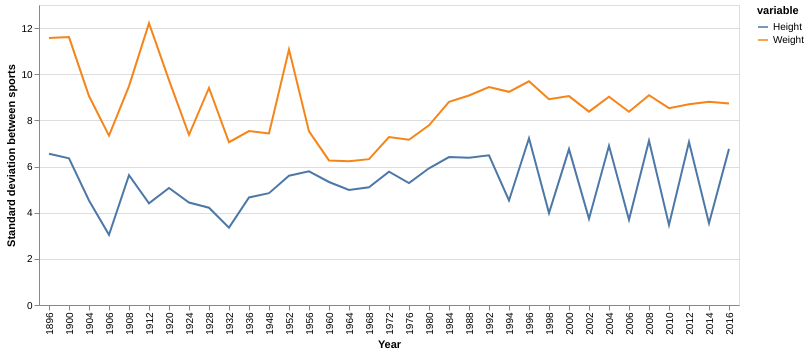

In [4]:
# standard deviation of weights between sports across years

# higher = more specialisation

mean_by_year = data.groupby(["Year","Sport"])["Weight","Height"].mean()

std_mean_by_year = mean_by_year.groupby(["Year"]).std().reset_index()

melted = std_mean_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"],value_name="Standard deviation between sports")

alt.Chart(melted).mark_line().encode(
    x='Year:O',
    y='Standard deviation between sports:Q',
    color='variable'
)

In [5]:
#goldMedalists = data[(data.Medal == 'Gold')]

In [6]:
# Try and understand this cell at your own risk

desc = pd.read_csv(
    "european-social-survey-ess-8-ed21-201617/variables.csv",
    dtype = {
        'Name': str,
        'Label': str,
        'Country_specific': object, # actually bool
        'Scale_type': str,
        'Type': str,
        'Format': str,
        'Valid': object, # can't use "id" as type
        'Invalid': object, # can't use "id" as type
        'Question': str,
        'Group': str
    }
)

def translate_format(format_string: str) -> str:
    return str
    # I tried being more specific I just kept getting errors
    # So we will just load data as if its all str's and deal with that later
    # Using "if "numeric" in format_string" trigger error due to "in"
#     try:
#         format_string.index("numeric")
#     except:
#         return int
#     else:
#         return str

desc['Format'] = desc['Format'].map(translate_format)
desc_cut = desc.filter(["Name","Format"])
data_dict = dict(zip(desc_cut['Name'], desc_cut['Format']))

# `data_dict` defines the the data type of each column in `data` in the next cell
print(len(data_dict))
print(data_dict["cntry"])


534
<class 'str'>


In [12]:
data = pd.read_csv(
    "european-social-survey-ess-8-ed21-201617/ESS8e02.1_F1.csv",
    dtype = data_dict
)

        name essround edition    proddate idno cntry nwspol netusoft netustm  \
0  ESS8e02_1        8     2.1  01.12.2018    1    AT    120        4     180   
1  ESS8e02_1        8     2.1  01.12.2018    2    AT    120        5     120   
2  ESS8e02_1        8     2.1  01.12.2018    4    AT     30        2    6666   
3  ESS8e02_1        8     2.1  01.12.2018    6    AT     30        5     120   
4  ESS8e02_1        8     2.1  01.12.2018   10    AT     30        5     180   

  ppltrst  ... inwsmm inwdde inwmme inwyye inwehh inwemm inwtm  \
0       8  ...     37      5     12   2016      8     33    50   
1       6  ...     39     25     11   2016     11     10    86   
2       5  ...     17     22     11   2016     18      0    38   
3       6  ...      9     11     10   2016     19     59    46   
4       5  ...     31      1     12   2016     11     49    70   

             dweight            pspwght      pweight  
0  0.611677050590515   1.17849552631378  0.370392886  
1   1.223354

In [63]:
# A simple beginning for starting to learn how to incorporate interaction

import ipywidgets as widgets
from IPython.display import display
#print(desc.Group.unique())

interestGroup = widgets.Dropdown(
    # `e[6:]` remove "Group" substring from before each option
    # `desc.Group.unique()` gets all unique values in the `Group` column
    # `[2:]` removes first 2 options of `Country` and `Weights`
    options=[e[6:] for e in desc.Group.unique()[2:]],
    description='Interest:',
)
display(interestGroup)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # Select questions group
        interested_desc = desc[(desc.Group == "Group " + interestGroup.value)]
        # Select non-country-specific questions
        interested_desc = interested_desc[interested_desc.Country_specific == "no"]
        #print(interested_desc.Name)
        # Merge with `data` to select desired questions by name
        merged = data.filter(interested_desc.Name)
        print(merged.shape)

interestGroup.observe(on_change)

Dropdown(description='Interest:', options=('Media and social trust', 'Politics', 'Subjective well-being, socia…

208     dfincac
209     smdfslv
210     uemplwk
211     slvpens
212     slvuemp
213     gvslvol
214     gvslvue
215     gvcldcr
216     sbstrec
217     sbprvpv
218     sbeqsoc
219     sbbsntx
220      sblazy
221     sblwcoa
222     imsclbn
223     uentrjb
224     lbenent
225     bennent
226       admub
227       ubpay
228       ubedu
229       ubunp
230     ub50pay
231     ub50edu
232     ub50unp
233     ub20pay
234     ub20edu
235     ub20unp
236     ubsppay
237     ubspedu
238     ubspunp
239     bnlwinc
240     eduunmp
241     wrkprbf
242      basinc
243     eusclbf
244     eudcnbf
245      lkuemp
246     lknemny
247    vteurmmb
248    vteumbgb
249    vteubcmb
Name: Name, dtype: object
(44387, 42)
